<a href="https://colab.research.google.com/github/Om-Shree-0709/Pytorch/blob/main/Placement_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)
print('Setup Complete')

1.26.4
2.2.2
Setup Complete


# Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model

In [11]:
df= pd.read_csv('/content/sample_data/placement.csv')
print(f'First 5 rows of the DataFrame:\n{df.head()}')
print('\n')
print(f'Shape of the DataFrame:\n {df.shape}')
print('\n')
#to check if any data is missing or garbage or duplicate
print(f'Information of the DataFrame:\n {df.info()}')

#Note: First Column is useless => Data Cleaning > We Remove it .

First 5 rows of the DataFrame:
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


Shape of the DataFrame:
 (100, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
Information of the DataFrame:
 None


In [12]:
#PRE-PROCESSING

#to remove the first col=>
df=df.iloc[:,1:]
print(f'First 5 rows of the DataFrame:\n{df.head()}')

First 5 rows of the DataFrame:
   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0


In [16]:
#For EDA we use `matplotlib.pyplot as plt`

import matplotlib.pyplot as plt
import matplotlib

print(matplotlib.__version__) # Access the version from the main matplotlib module

3.10.0


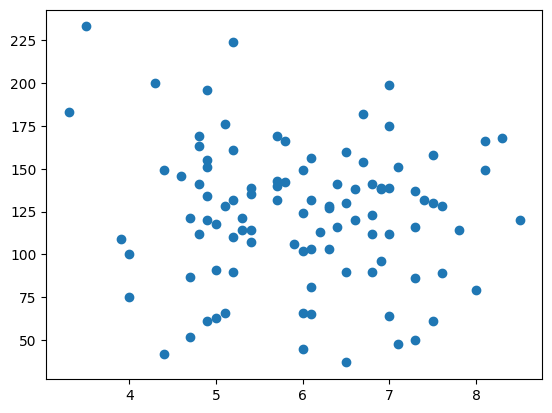

In [18]:
plt.scatter(df['cgpa'],df['iq'])

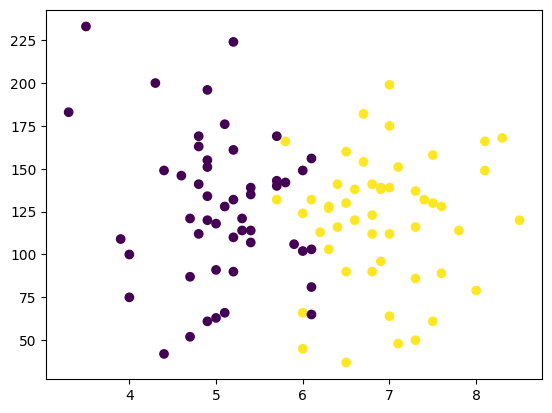

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
#colouring the placed and unplaced students
#yellow=Placed
#Blue=Unplaced

In [23]:
# Feature Selection
# Independent Variables: Cgpa and IQ => Store in X
# Dependent Variable: Placement => Store in Y

x=df.iloc[:,0:2] #=> sirf 1st aur 2nd Column chayea
y=df.iloc[:,-1]  #=> Last Column Chayea

print(f'X:\n{x.head()}\n')
print(f'shape of x:{x.shape}')
print(f'Y:\n{y.head()}')
print(f'shape of x:{y.shape}')

X:
   cgpa     iq
0   6.8  123.0
1   5.9  106.0
2   5.3  121.0
3   7.4  132.0
4   5.8  142.0

shape of x:(100, 2)
Y:
0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64
shape of x:(100,)


# Step 3
**Train_Test_Split**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)
#Store in 4 Different Variables Randomly

print(f'X_train Shape :\n{X_train.shape}')
print(f'X_test Shape :\n{X_test.shape}')
print(f'Y_train Shape :\n{Y_train.shape}')
print(f'Y_test Shape :\n{Y_test.shape}')

X_train Shape :
(90, 2)
X_test Shape :
(10, 2)
Y_train Shape :
(90,)
Y_test Shape :
(10,)


**Step 2**
**Now We Do Scaling**

In [29]:
from re import X
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler()
Y_scaler=StandardScaler()

X_train_scaled=X_scaler.fit_transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

print(f'X_train_scaled:\n{X_train_scaled}')
print(f'X_test_scaled:\n{X_test_scaled}')
#Scaled and Transformed only X

X_train_scaled:
[[ 0.30040366  0.05033183]
 [ 0.38678171  0.38492409]
 [-0.21786464  0.15328329]
 [ 0.12764756  0.15328329]
 [ 0.04126951 -0.05261964]
 [-0.90888903  0.74525421]
 [ 1.7688305  -1.21082361]
 [-0.21786464  1.10558434]
 [ 0.90505    -1.5968916 ]
 [ 0.73229391  0.38492409]
 [ 1.33694025 -1.6741052 ]
 [ 0.30040366  0.02459396]
 [ 2.02796464  1.07984647]
 [ 0.38678171 -0.25852257]
 [ 0.04126951 -2.08591106]
 [-0.64975488  2.52116697]
 [ 0.47315976  0.87394354]
 [ 0.47315976  0.10180756]
 [-1.34077928  0.59082702]
 [ 0.04126951  0.59082702]
 [-1.77266952 -0.43868763]
 [-0.47699878 -0.49016336]
 [-0.64975488 -0.92770708]
 [-0.21786464  0.35918622]
 [-2.29093782  1.46591446]
 [ 0.55953781 -0.1555711 ]
 [-1.08164513 -1.00492068]
 [-0.64975488  0.89968141]
 [-0.90888903  1.80050672]
 [-0.82251098 -0.20704683]
 [-0.56337683 -0.12983324]
 [-0.99526708  1.10558434]
 [ 1.85520855  1.02837074]
 [ 0.90505    -0.36147403]
 [-0.04510854 -0.51590123]
 [-0.64975488  0.15328329]
 [ 1.5960744

In [32]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

**Step 4 : Model Training**

In [34]:
clf.fit(X_train,Y_train)

LogisticRegression()

**Step 5 : Model Evaluation**

In [38]:
#now we test how well r model is
y_pred=clf.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 1 1 1 0]


In [36]:
Y_test
#this is the actual Result

,placement
94,0
5,1
77,1
4,0
48,1
66,1
35,1
8,0
21,1
25,0


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

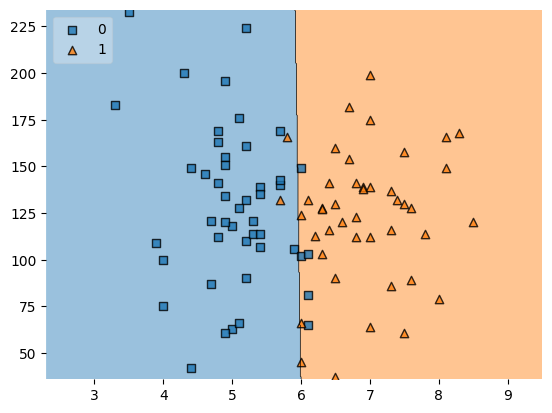

In [43]:
# Import necessary libraries
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np

# Assuming X_train is your pandas DataFrame
plot_decision_regions(X=X_train.values, # Convert X_train to a NumPy array using .values
                      y=Y_train.values, # Convert Y_train to a NumPy array using .values
                      clf=clf,
                      legend=2)

**Import Export Model : Last Step**

In [45]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))

**Now just Move the file Model.pkl and connect to website**
#Last Step Done